In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape
# there are 1338 columns and 7 rows in the data set

(1338, 7)

In [6]:
df.dtypes
# the columns consists of different datatypes, so we need to make them same
# the catagorical columns will be converted to numeric data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.nunique().to_frame('No. of unique values')

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [10]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [11]:
for col_name in df.columns:
    if(df[col_name].dtype == 'float'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [12]:
df.info()
# now all the columns have same datatype
# there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       1338 non-null   int64
 1   sex       1338 non-null   int8 
 2   bmi       1338 non-null   int16
 3   children  1338 non-null   int64
 4   smoker    1338 non-null   int8 
 5   region    1338 non-null   int8 
 6   charges   1338 non-null   int16
dtypes: int16(2), int64(2), int8(3)
memory usage: 30.2 KB


In [13]:
cor=df.corr()

In [14]:
cor
# age and smoker are having a positive strong correlation with medical charges

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.112052,0.042469,-0.025019,0.002127,0.534522
sex,-0.020856,1.000000,0.044714,0.017163,0.076185,0.004588,0.009533
bmi,0.112052,0.044714,1.000000,0.011228,0.002085,0.155176,0.119902
children,0.042469,0.017163,0.011228,1.000000,0.007673,0.016569,0.126132
smoker,-0.025019,0.076185,0.002085,0.007673,1.000000,-0.002181,0.663509
region,0.002127,0.004588,0.155176,0.016569,-0.002181,1.000000,-0.043780
charges,0.534522,0.009533,0.119902,0.126132,0.663509,-0.043780,1.000000


<Axes: >

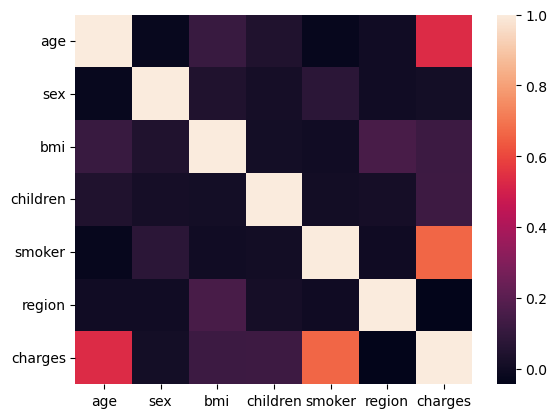

In [15]:
sns.heatmap(cor)

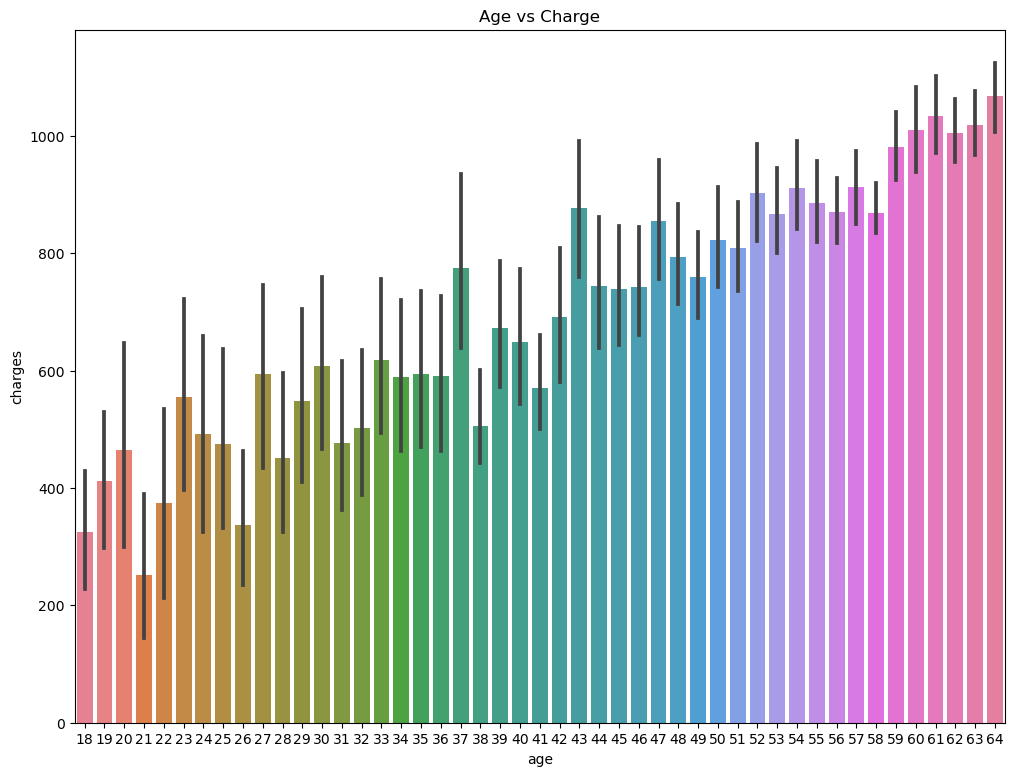

In [16]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df,palette='husl')
plt.show()
# age has positive relation with charges,as age increases, medical charges also increases

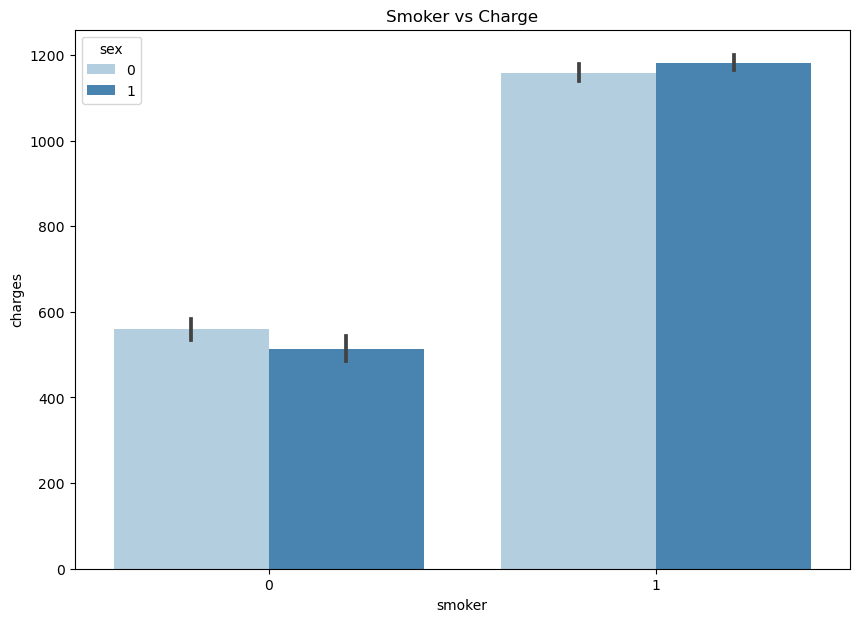

In [17]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')
plt.show()
# smokers pay more medical charges than non-smokers

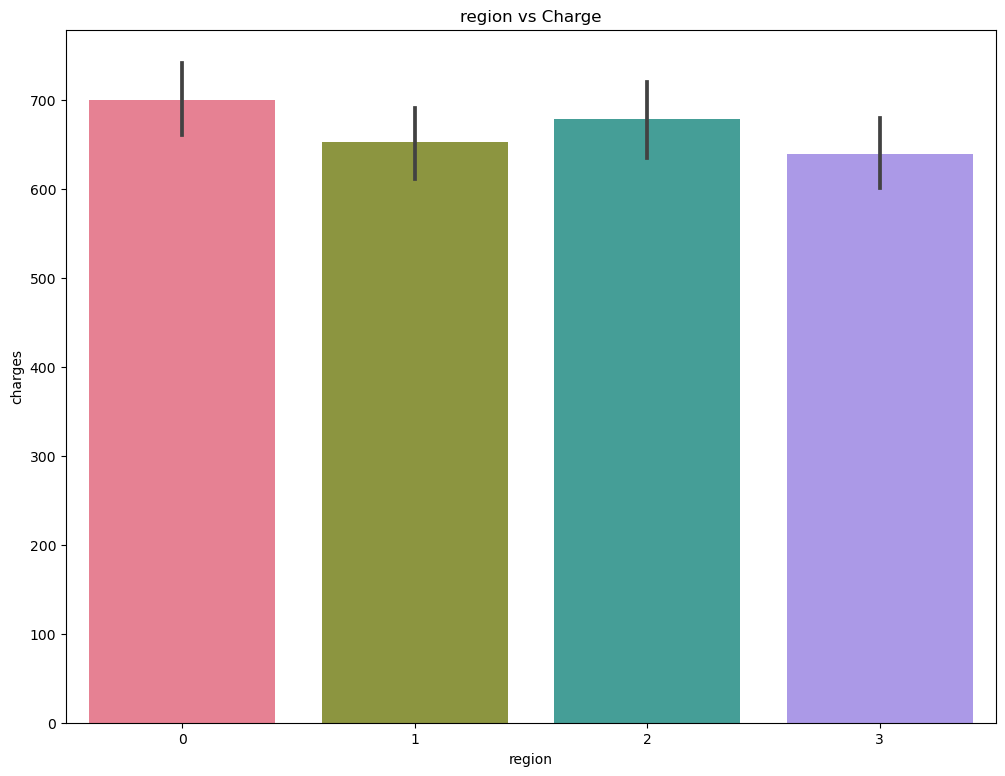

In [18]:
plt.figure(figsize=(12,9))
plt.title('region vs Charge')
sns.barplot(x='region',y='charges',data=df,palette='husl')
plt.show()
# region doesnot have much impact on medical charges

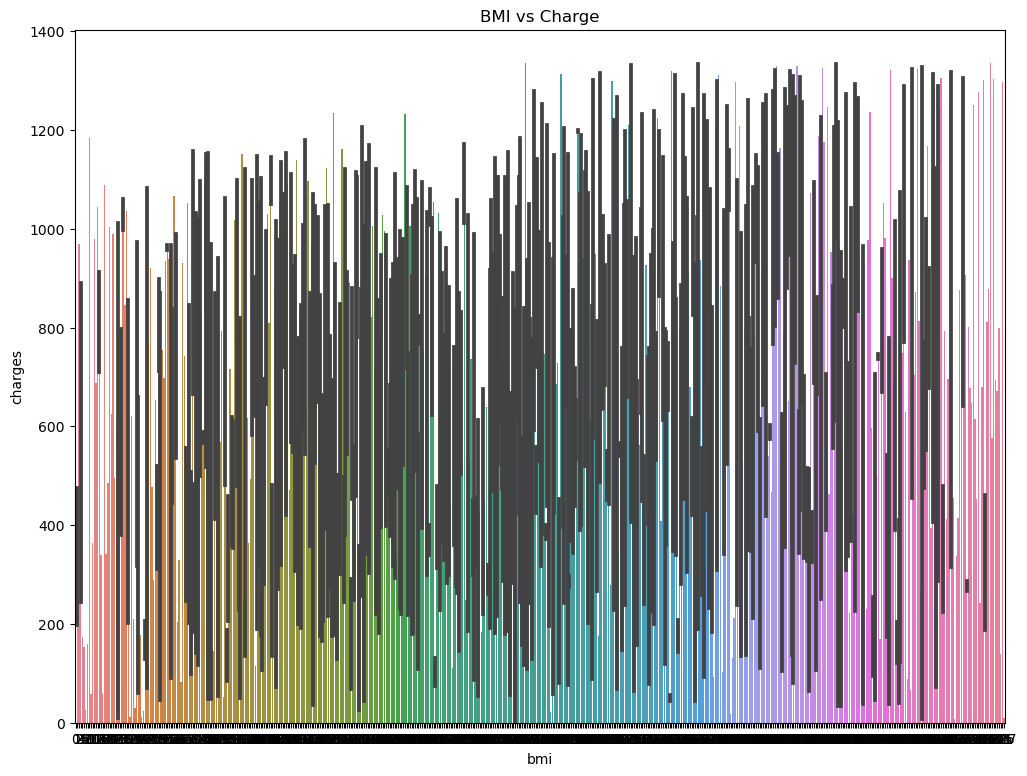

In [19]:
plt.figure(figsize=(12,9))
plt.title('BMI vs Charge')
sns.barplot(x='bmi',y='charges',data=df,palette='husl')
plt.show()
# BMI is not showing any significant relationship with medical charge

age            Axes(0.125,0.53;0.110714x0.35)
sex         Axes(0.257857,0.53;0.110714x0.35)
bmi         Axes(0.390714,0.53;0.110714x0.35)
children    Axes(0.523571,0.53;0.110714x0.35)
smoker      Axes(0.656429,0.53;0.110714x0.35)
region      Axes(0.789286,0.53;0.110714x0.35)
charges        Axes(0.125,0.11;0.110714x0.35)
dtype: object

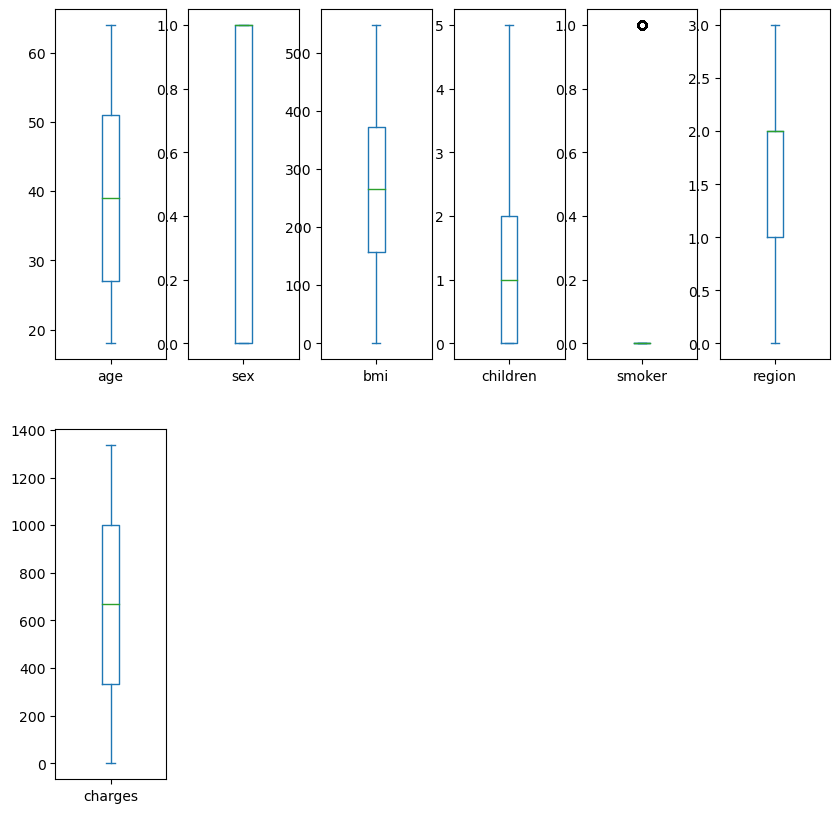

In [20]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))
# there are no outliers in any column expect in smoker column

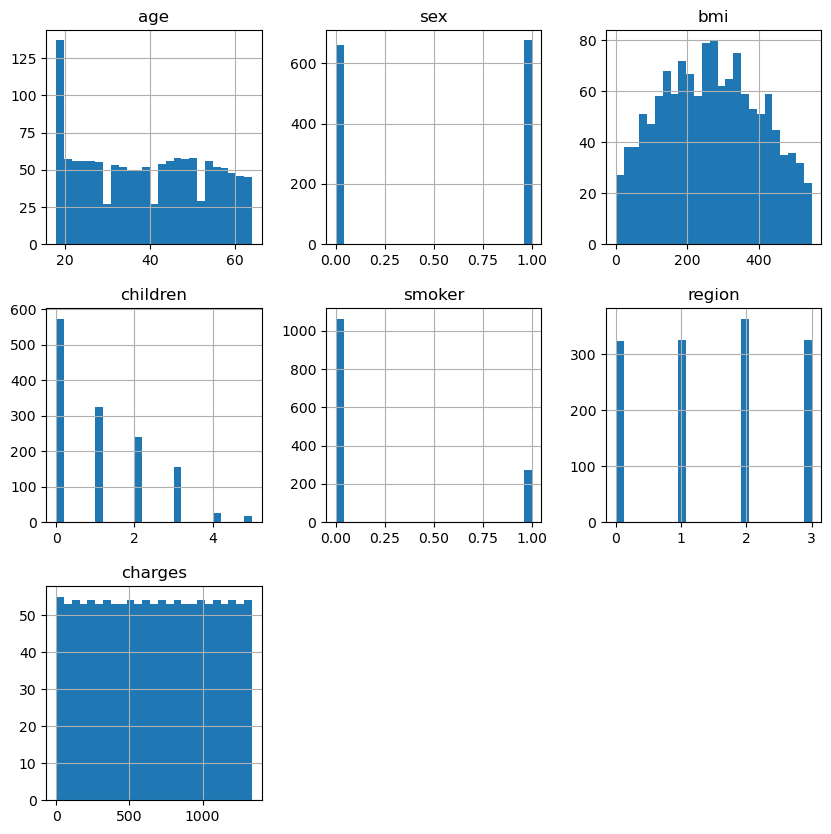

In [21]:
df.hist(bins=25,figsize=(10,10))
plt.show()

In [22]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,266.073991,1.094918,0.204783,1.515695,667.531390
std,14.049960,0.500160,137.520618,1.205493,0.403694,1.104885,386.338994
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,157.250000,0.000000,0.000000,1.000000,333.250000
50%,39.000000,1.000000,266.000000,1.000000,0.000000,2.000000,667.500000
75%,51.000000,1.000000,371.750000,2.000000,0.000000,2.000000,1001.750000
max,64.000000,1.000000,547.000000,5.000000,1.000000,3.000000,1336.000000


In [23]:
df.skew()
# finding the skewness in data to see those columns where skewness in between -0.5 to 0.5.
# Children and smoker column are showing skewness



age         0.055673
sex        -0.020951
bmi         0.060681
children    0.938380
smoker      1.464766
region     -0.038101
charges     0.000442
dtype: float64

In [24]:
df['children']=np.cbrt(df['children'])
df['smoker']=np.cbrt(df['smoker'])

In [26]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
# seperationg label and features

In [27]:
x

,age,sex,bmi,children,smoker,region
0,19,0,197,0.00000,1.0,3
1,18,1,350,1.00000,0.0,2
2,28,1,331,1.44225,0.0,2
3,33,1,73,0.00000,0.0,1
4,32,1,223,0.00000,0.0,1
...,...,...,...,...,...,...
1333,50,1,276,1.44225,0.0,1
1334,18,0,302,0.00000,0.0,0
1335,18,0,422,0.00000,0.0,2
1336,21,0,146,0.00000,0.0,3


In [28]:
y

0       1005
1         57
2        306
3       1097
4        254
        ... 
1333     746
1334     118
1335      32
1336      91
1337    1171
Name: charges, Length: 1338, dtype: int16

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i)
                   for i in range(len(x.columns))]
vif['Factors']=x.columns
vif
# Here age is highest VIF. But since age is the second highest correlated factor in medical charge so we are not removing it.
# we are removing bmi column as it is not showing any significant relationship with charge and has the secong highest VIF

,VIF values,Factors
0,4.877998,age
1,1.917202,sex
2,4.301202,bmi
3,2.124062,children
4,1.245437,smoker
5,2.706841,region


In [30]:
x.drop('bmi', axis=1, inplace=True)
# here we are removing bmi coloum as they are showing very high VIF and have least cprrelation with x

In [31]:
x

,age,sex,children,smoker,region
0,19,0,0.00000,1.0,3
1,18,1,1.00000,0.0,2
2,28,1,1.44225,0.0,2
3,33,1,0.00000,0.0,1
4,32,1,0.00000,0.0,1
...,...,...,...,...,...
1333,50,1,1.44225,0.0,1
1334,18,0,0.00000,0.0,0
1335,18,0,0.00000,0.0,2
1336,21,0,0.00000,0.0,3


In [35]:
#MODELLING
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRs= i
print('Best Accuracy is:',maxAccu, 'at random_state',maxRs)

Best Accuracy is: 0.0024875621890547263 at random_state 22


In [36]:
# creating Train, Test, Split:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [37]:
# CLASSIFIACTION ALGORITHMS:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [38]:
# RandomForest Classifier:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.0
[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          30       0.00      0.00      0.00       1.0
          31       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          3

In [ ]:
#Logistic Regression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

In [ ]:
# Support Vector Machine Classifier:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

In [ ]:
# GradientBoosting Classifier:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

In [ ]:
#Adaboost Classifier:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

In [ ]:
#Bagging Classifier:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
predBG=BG.predict(x_test)
print(accuracy_score(y_test,predBG))
print(confusion_matrix(y_test,predBG))
print(classification_report(y_test,predBG))

In [ ]:
#ExtraTreesClassifier:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

In [ ]:
# cross validation (CV) score: for randomforest classifier
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation is-', accuracy_score(y_test,predRFC)-score.mean())

In [ ]:
# cross validation (CV) score: for ExtraTreesClassifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation is-', accuracy_score(y_test,predET)-score.mean())

In [ ]:
#HYPER PARAMETRIC TUNING
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entrophy'], 'random_state': [10,50,100], 'max_depth': [0,10,20], 'n_jobs': [-2,-1,1], 'n_estimators': [50,100,200,300]}

In [ ]:
GCV=GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_model=RandomForestClassifier(criterion= 'gini', max_depth= 20, n_estimators=50, n_jobs= -2,random_state= 50)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)